<a href="https://colab.research.google.com/github/Venckus/toai_10mk4_b/blob/main/breast_cancer_fastai_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# !pip install --no-deps "fastai==2.2.6"
!pip install "fastai==2.2.7"

     |████████████████████████████████| 194kB 6.2MB/s 
     |████████████████████████████████| 12.8MB 232kB/s 
     |████████████████████████████████| 776.8MB 21kB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision.all import *
import tensorflow as tf

In [ ]:
# !rm -rf /usr/local/lib/python3.7/dist-packages/fastprogress-1.0.0.dist-info

In [ ]:
!ls /usr/local/lib/python3.7/dist-packages/fastai/

basics.py	imports.py    losses.py     _pytorch_doc.py  torch_imports.py
callback	__init__.py   medical	    tabular	     vision
collab.py	interpret.py  metrics.py    test_utils.py
data		launch.py     _nbdev.py     text
distributed.py	layers.py     optimizer.py  torch_basics.py
fp16_utils.py	learner.py    __pycache__   torch_core.py


In [ ]:
!cat /usr/local/lib/python3.7/dist-packages/fastai/version.py

cat: /usr/local/lib/python3.7/dist-packages/fastai/version.py: No such file or directory


# Data download

In [ ]:
import json
api_token = {"username": "x", "key": "y"} 
!mkdir -p ~/.kaggle/
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!ls -la /root/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Apr  9 17:02 .
drwx------ 1 root root 4096 Apr  9 17:02 ..
-rw------- 1 root root   73 Apr  9 17:02 kaggle.json


In [ ]:
!pwd

/content


In [ ]:
!ls -la ./sample_data

total 55512
drwxr-xr-x 1 root root     4096 Apr  7 13:36 .
drwxr-xr-x 1 root root     4096 Apr  7 13:36 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Apr  7 13:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Apr  7 13:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Apr  7 13:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Apr  7 13:36 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [ ]:
path = '/content/data/breast-cancer'

In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset -p {path}

 95% 186M/195M [00:05<00:00, 34.6MB/s]
100% 195M/195M [00:05<00:00, 34.1MB/s]


In [ ]:
!ls /content/data/breast-cancer
# !rm -rf /content/data/breast-cancer/breast-cancer

breast-ultrasound-images-dataset.zip


In [ ]:
!unzip -q -n {path}/breast-ultrasound-images-dataset.zip -d {path}

In [ ]:
!ls /content/data/breast-cancer/Dataset_BUSI_with_GT

benign	malignant  normal


In [ ]:
path = Path(r"/content/data/breast-cancer/Dataset_BUSI_with_GT")

# Loading data

In [ ]:
files = get_image_files(path)
len(files), type(files)

(1578, fastcore.foundation.L)

In [ ]:
# get rid of _mask files
fnames = files.filter(lambda x: '_mask' not in x.stem)
# some = files.argwhere(lambda x : '_mask' in x.stem)
# some
len(fnames)

780

In [ ]:
fnames[0], fnames[9], fnames[279], fnames[281]
# files[:5]

(Path('/content/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (20).png'),
 Path('/content/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (192).png'),
 Path('/content/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (108).png'),
 Path('/content/data/breast-cancer/Dataset_BUSI_with_GT/normal/normal (12).png'))

In [ ]:
# codes = np.array([f'{path}/benign', f'{path}/malignant', f'{path}/normal'])
codes = np.array(['benign', 'malignant', 'normal'])
codes

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [ ]:
mask_tensor

<function fastai.vision.augment.mask_tensor>

In [ ]:
def get_y_fn(x): return path/f"{x.parent.name}/{x.stem}{x.suffix}"
def label_func(x): return path/f"{x.parent.name}/{x.stem}_mask{x.suffix}"

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8,
    fnames=fnames, #get_image_files(path), # fnames=files,
    label_func=label_func,
    codes=codes,
    div=True,
    # item_tfms=[AddMaskCodes(codes=codes),Resize(224)],
    item_tfms=Resize(224), #, method="squish"),
    # batch_tfms=[RandomResizedCropGPU(size=224, min_scale=0.85), Rotate(), Zoom()] ,#aug_transforms(size=224),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)],
  )

In [ ]:
cancer = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = get_y_fn,
                   splitter=RandomSplitter(),
                  #  item_tfms=Resize(224),
                   item_tfms=[AddMaskCodes(codes=codes), Resize(224)], # ,Resize((224,224))
                  #  batch_tfms=Normalize.from_stats(*imagenet_stats)
                  #  batch_tfms=aug_transforms(size=(120,160))
)

In [ ]:
c_dls = cancer.dataloaders(path, path=path, bs=8)

In [ ]:
dls, c_dls

(<fastai.data.core.DataLoaders at 0x7f211610df10>,
 <fastai.data.core.DataLoaders at 0x7f2116288e10>)

In [ ]:
db = DataBlock(blocks=(TransformBlock(type_tfms=partial(MSTensorImage.create, chnls_first=True)),
                       TransformBlock(type_tfms=[get_lbl_fn, partial(open_npy, cls=TensorMask)], 
                                      item_tfms=AddMaskCodes(codes=codes)),
                      ),
               get_items=partial(get_files, extensions='.png'),
               splitter=RandomSplitter(valid_pct=0.2)
              )

db.summary(source=imgs_path)

NameError: ignored

In [ ]:
dls.vocab = codes
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'benign': 0, 'malignant': 1, 'normal': 2}

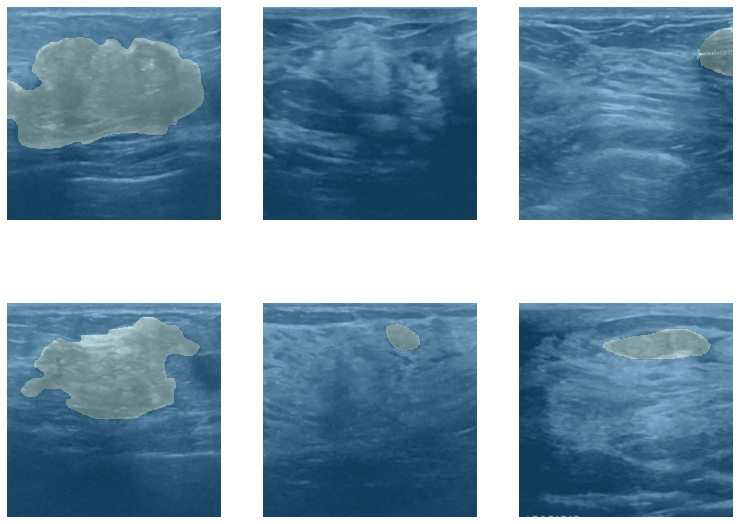

In [ ]:
dls.show_batch(max_n=6, vmin=1, vmax=3, figsize=(13,10))

In [ ]:
dls.show_batch(max_n=1, show=False)

(TensorImage([[[[204, 206, 205,  ..., 195, 184, 180],
           [166, 166, 167,  ..., 176, 163, 157],
           [146, 147, 148,  ..., 115, 109, 108],
           ...,
           [117, 117, 116,  ...,  40,  44,  47],
           [ 96, 101, 108,  ...,  45,  46,  46],
           [ 91,  91,  94,  ...,  49,  46,  43]],
 
          [[204, 206, 205,  ..., 195, 184, 180],
           [166, 166, 167,  ..., 176, 163, 157],
           [146, 147, 148,  ..., 115, 109, 108],
           ...,
           [117, 117, 116,  ...,  41,  45,  48],
           [ 96, 101, 108,  ...,  46,  47,  47],
           [ 91,  91,  94,  ...,  50,  47,  44]],
 
          [[204, 206, 205,  ..., 195, 184, 180],
           [166, 166, 167,  ..., 176, 163, 157],
           [146, 147, 148,  ..., 115, 109, 108],
           ...,
           [117, 117, 116,  ...,  41,  45,  48],
           [ 96, 101, 108,  ...,  45,  47,  47],
           [ 91,  91,  94,  ...,  50,  47,  44]]],
 
 
         [[[175, 172, 167,  ..., 180, 183, 178],
    

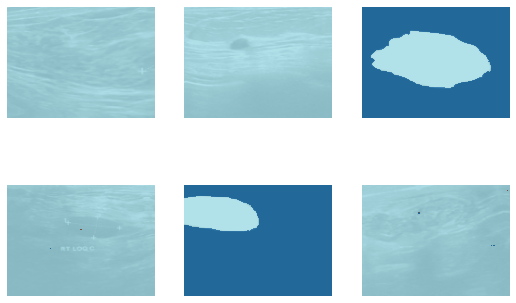

In [ ]:
c_dls.show_batch(max_n=6, vmin=1, vmax=3, alpha=0.8)

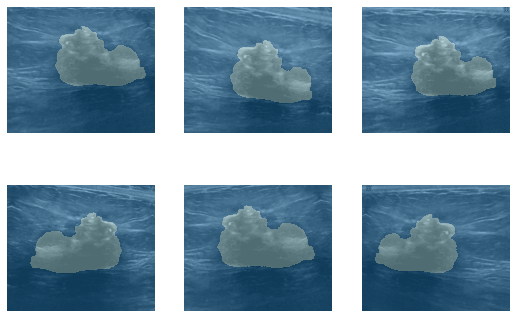

In [ ]:
cam_dsrc = Datasets([files[0]]*10, [PILImage.create, [label_func, PILMask.create]])
cam_tdl = TfmdDL(cam_dsrc.train, after_item=ToTensor(),
                 after_batch=[IntToFloatTensor(), *aug_transforms()], bs=9)
cam_tdl.show_batch(max_n=6, vmin=1, vmax=3)

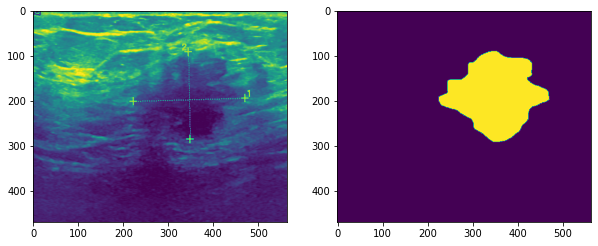

In [ ]:
image = tf.io.read_file('/content/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (119).png')
mask = tf.io.read_file('/content/data/breast-cancer/Dataset_BUSI_with_GT/malignant/malignant (119)_mask.png')
image = tf.io.decode_png(image, channels=1) #
mask = tf.io.decode_png(mask) #, channels=0
img = tf.squeeze(image).numpy()
msk = tf.squeeze(mask).numpy()

plt.figure(figsize=(10,14))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(msk)
# plt.axis('off')
plt.show()

In [ ]:
msk.size

264516

In [ ]:
msk.shape, mask.shape

((469, 564), TensorShape([469, 564, 1]))

In [ ]:
x1, y1 = first(dls.train)
print(x1.shape, y1.shape, y1.max(), torch.unique(y1))

torch.Size([8, 3, 224, 224]) torch.Size([8, 224, 224]) TensorMask(255) TensorMask([  0, 255])


In [ ]:
xb, yb = first(c_dls.train)
print(xb.shape, yb.shape, yb.max(), torch.unique(yb))

torch.Size([8, 3, 224, 224]) torch.Size([8, 224, 224]) TensorMask(255) TensorMask([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,

In [ ]:
len(dls.valid_ds.items), len(dls.train_ds.items)

(156, 624)

In [ ]:
dls.train_ds.show

<bound method Datasets.show of (#624) [(PILImage mode=RGB size=557x462, PILMask mode=L size=557x462),(PILImage mode=RGB size=582x431, PILMask mode=L size=582x431),(PILImage mode=RGB size=685x583, PILMask mode=L size=685x583),(PILImage mode=RGB size=558x469, PILMask mode=L size=558x469),(PILImage mode=RGB size=771x570, PILMask mode=L size=771x570),(PILImage mode=RGB size=562x470, PILMask mode=L size=562x470),(PILImage mode=RGB size=558x470, PILMask mode=L size=558x470),(PILImage mode=RGB size=558x466, PILMask mode=L size=558x466),(PILImage mode=RGB size=681x559, PILMask mode=L size=681x559),(PILImage mode=RGB size=556x473, PILMask mode=L size=556x473)...]>

In [ ]:
dls.sample()

<generator object DataLoader.sample.<locals>.<genexpr> at 0x7f21162563d0>

# Models

In [ ]:
learn = unet_learner(c_dls, resnet34)
learn.fine_tune(2)

epoch,train_loss,valid_loss,time


IndexError: ignored